<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module C** 
**Section 19.1:** Root Finding

**Section 19.2:** Tolerance

**Section 19.3:** Bisection Method

**Section 19.4:** Newton-Raphson Method

**Section 19.5:** Root Finding in Python

---



###**Section 19.1 Root Finding**

*Summary:* 

We often need to find the root of a function (the points where the function is zero). For many functions, we can figure this out analytically. However, this becomes more difficult depending on the function that we use. Thus, we can use numerical approximations to find the roots instead. There are some scenarios where this approach falls short, however.

---





*Implementation:*

Lets consider two scenarios, where we find the roots numerically. For the first scenario lets look at the function $f(x) = x^3 - x^2 + 2$. We can write a short script using the libraries `numpy`, `matplotlib`, and `scipy`. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return x**3 - x**2 + 2

solve = optimize.root(f, x0=1.5, method='hybr')
root = solve.x[0]

print("The root of f(x):", root)

The root of f(x): -1.0


Here we see using `optimize.root` that the root of $f(x)$ is $-1$. This function works by applying root finding methods to an initial guess.

Let's look at the function graphically:

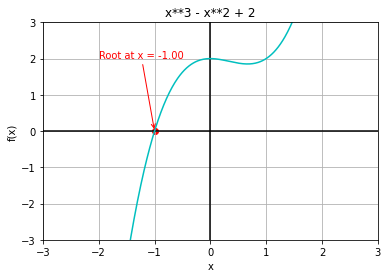

In [ ]:
fig, ax = plt.subplots()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x**3 - x**2 + 2')

x = np.linspace(-5, 5, 1000)
ax.plot(x, f(x), color = 'c')

ax.set_ylim(-3, 3)
ax.set_xlim(-3, 3)

#plot a point at the root
plt.scatter(root, f(root), color='red')
plt.annotate(f'Root at x = {root:.2f}', (root, 0), xytext=(-2, 2),
             arrowprops=dict(arrowstyle='->', color='red'), color='red')

plt.grid()

We can see graphically that the function has one root. However, some functions have multiple roots. For the second scenario, lets look at the function $g(x) = x^3 - 3x^2 + x$

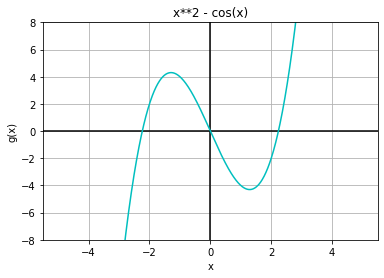

In [ ]:
def g(x):
    return x**3 - 3*x*2 + x 

fig, ax = plt.subplots()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('x**2 - cos(x)')

x = np.linspace(-5, 5, 1000) # scale the x-axis
#plt.plot(x, g(x))
ax.plot(x, g(x), color = 'c')

ax.set_ylim(-8, 8)
#ax.set_xlim(-5, 5)

plt.grid()

In this case we have multiple roots, thus we have to adjust the initial guess when using `optimize.root` to find the roots.

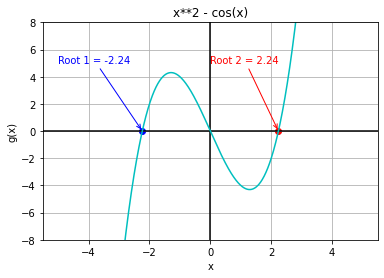

Root 1 for g(x): 2.2360679774997902
Root 2 for g(x): -2.2360679774997902


In [ ]:
#Solve for the first root
solve1 = optimize.root(g, x0=10, method='hybr')
root1 = solve1.x[0]

#solve for the second root
solve2 = optimize.root(g, x0=-10, method='hybr')
root2 = solve2.x[0]

fig, ax = plt.subplots()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('x**2 - cos(x)')

x = np.linspace(-5, 5, 1000)

ax.plot(x, g(x), color = 'c')

ax.set_ylim(-8, 8)

#plot both roots
plt.scatter(root2, g(root2), color='blue')
plt.annotate(f'Root 1 = {root2:.2f}', (root2, 0), xytext=(-5, 5),
             arrowprops=dict(arrowstyle='->', color='blue'), color='blue')
plt.scatter(root1, g(root1), color='red')
plt.annotate(f'Root 2 = {root1:.2f}', (root1, 0), xytext=(0, 5),
             arrowprops=dict(arrowstyle='->', color='red'), color='red')

plt.grid()
plt.show()
print("Root 1 for g(x):", root1)
print("Root 2 for g(x):", root2)

By adjusting our initial guess `x0` we can use the numerical approach to find two of the roots. Graphically, we see that the last root is at $x=0$.

---

###**Section 19.2 Tolerance**




*Summary:* 

When computing roots we take into consideration the error, which is the difference between the exact or expected root and what we compute. The threshold that we deem to be acceptable is called tolerance. When the error is less than the tolerance, we have converged to a solution.

---





*Implementation:* 

Since `scipy.optimize.root` uses a numerical approach and `np.roots` is based on an analytical method involving eigenvectors, we can use these two methods to calculate error. Let's consider the function $f(x) = x^3 - 2x^2 + 2$.

In [ ]:
import numpy as np
from scipy.optimize import root

def f(x):
    return x**3 - 2*x**2 + 2

tolerance = 1e-13

#scipy
result1 = root(f, x0=-1.5, method='hybr')
result1 = result1.x[0]

#numpy
coeff = [1,-2,0,2]
result2 = np.roots(coeff)
result2 = np.real(result2[2])

error = abs(result2 - result1) / abs(result2)
print(f"Result1 {result1} \nResult2 {result2} \nabsolute error: {error}")
print(f"{'Within tolerance' if error < tolerance else 'Not within tolerance'}")


Result1 -0.8392867552141696 
Result2 -0.8392867552141612 
absolute error: 1.0053411345682608e-14
Within tolerance


From this example we can see that the numerical method would be acceptable within a tolerance defined by $\text{absolute error} < 1 * 10^{-13}$


---

###**Section 19.3 Bisection Method**




*Summary:* 

The bisection method is an implementation using the intermediate value theorem. Essentially, if a function is continuous and we have two function values with opposite signs, the root is somewhere inbetween those function values. The midpoint between those two values will either be the root, positive, or negative. If the midpoint is not the root, then it is closer to the root than our previous function values. We can use this information to close in on the actual root.


---





*Implementation:* 

We can illustrate how the bisection method works by plotting each $f(a)$, $f(b)$, and $f(m)$, where $m$ is the midpoint between $a$ and $b$. I wrote a script which tracks the index of each recursion of `my_bisection`.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def f(x):
    return x**2 - 2

def my_bisection(f, a, b, tol, plots):

    sign1 = (f(a) < 0)
    sign2 = (f(b) < 0)

    if sign1 == sign2:
        print(f"f(a) = {f(a)} and f(b) = {f(b)} have the same sign.")
        return

    m = (a + b) / 2

    plots.append((a,b,m))

    sign3 = (f(m) < 0)
    if abs(f(m)) < tol:
        return m

    elif sign1 == sign3:
        return my_bisection(f, m, b, tol, plots)

    elif sign2 == sign3:
        return my_bisection(f, a, m, tol, plots)


def plot_bisection(f, a, b, tol):
    plots = []
    r = my_bisection(f, a, b, tol, plots)
    print(f"root : {r}")
    
    x = np.linspace(a, b, 1000)
    
    
    def show_plot(index):
        plot = plots[index]
        fig, ax = plt.subplots()
        ax.plot(x, f(x), label="f(x)")
        ax.axvline(x=plot[0], color="green", label="f(a)")
        ax.axvline(x=plot[1], color="blue", label="f(b)")
        ax.axvline(x=plot[2], color="red", label="f(m)")

        ax.axvline(x=0, color="black")
        ax.axhline(y=0, color="black")
        
        a, b, m = plot[0],plot[1],plot[2]
        
        ax.annotate(f"a = {a}", (0.5, 1.75),
                xytext=(0, 5),
                textcoords='offset points',)
        ax.annotate(f"b = {b}", (0.5, 1.5),
                xytext=(0, 5),
                textcoords='offset points',)
        
        ax.annotate(f"m = {m}", (0.5, 1.25),
                xytext=(0, 5),
                textcoords='offset points',)
        ax.legend()
        plt.show()
        
    
    interact(show_plot, index=(0, len(plots) - 1))

a, b, tol = 0, 2, 1e-2    
plot_bisection(f, a, b, tol)        
  

root : 1.4140625


interactive(children=(IntSlider(value=3, description='index', max=7), Output()), _dom_classes=('widget-interac…

Note: This script creates an interactive widget, which is not compatible with github. It can be viewed on the google colab page: https://colab.research.google.com/drive/18d4sUKpGuk4dlaUCc3Ev8a4bmSV1Gpbb#scrollTo=si-oywz4SjPU&line=1&uniqifier=1

Screenshot:

 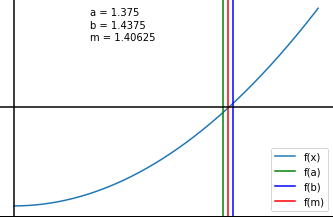

By adjusting the slider for `index` we can see how the bisection method converges to the root at $x = \sqrt{2}$.

---

###**Section 19.4 Newton-Raphson Method**





*Summary:* 

The Newton-Raphson method instead uses tangential lines to find the approximate root of a function. By using an initial guess for the root, we can use a linear approximation of the function at the guessing point. The line that is tangent to the curve will intersect the x-axis, which becomes the new guess. After the iteration, if we are within the tolerance, we have found a solution.


---



*Implementation:* 

We can write a similar script as before, but this time applying the Newton-Raphson Method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def f(x):
    return x**2 - 2

def df(x):
    return 2*x

def my_newton(f, df, x, tol, plots):
    plots.append(x)
    x_new = x - f(x)/df(x)
    if abs(x_new - x) < tol:
        return x_new

    return my_newton(f, df, x_new, tol, plots)

def plot_newton(f, df, x, tol):
    plots = []
    r = my_newton(f, df, x, tol, plots)
    print(f"root : {r}")
    
    x_ = np.linspace(0, 2, 1000)
    

    def show_plot(index):
        x = plots[index]
        fig, ax = plt.subplots()
        ax.plot(x_, f(x_), label="f(x)")
        ax.axvline(x=x, color="red", label="x_i")

        ax.annotate(f"x_i = {x}", (0.5, 1.25),
                xytext=(0, 5),
                textcoords='offset points',)
        
        ax.axvline(x=0, color="black")
        ax.axhline(y=0, color="black")
        
        ax.legend()
        plt.show()
        
    interact(show_plot, index=(0, len(plots) - 1))

x, tol = 1, 1e-12    

plot_newton(f, df, x, tol) 

root : 1.414213562373095


interactive(children=(IntSlider(value=2, description='index', max=5), Output()), _dom_classes=('widget-interac…

Note: This script creates an interactive widget, which is not compatible with github. It can be viewed on the google colab page: https://colab.research.google.com/drive/18d4sUKpGuk4dlaUCc3Ev8a4bmSV1Gpbb#scrollTo=Vh0vdNPLWUQ7&line=1&uniqifier=1

Screenshot:

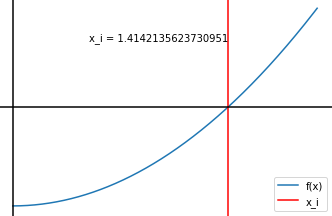

For the given function, this method outperformed the bisection method. By the fifth index the error defined by $\vert x_i - x \vert$ was less than a tolerance of $1 * 10^{-12}$.

---

###**Section 19.5 Root Finding in Python**





*Conclusion:* 

In this module, we discussed the uses of root finding as a numerical method. Python offers a variety of options for root finding due to the plethora of available libraries. The `scipy` and `numpy` libraries were used in the scope of the scripts I have written here. We use these numerical approaches when an analytical approach may be more difficult or inconvenient. These approaches offer approximate solutions, where the acceptable error is below a set tolerance. Each method, including an analytical approach, has advantages and disadvantages.